<a href="https://colab.research.google.com/github/XingxinHE/Python-for-Data-Analysis-Notes/blob/master/7_1_Handling_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

A significant amount of time is spent on data preparation: **loading, cleaning, transforming, and rearranging**. Such tasks are often reported to take up 80% or more of an analyst’s time.

For numeric data, pandas uses the floating-point value NaN(Not a Number) to represent missing data.

In pandas, we've adopted a convention used in the R programming language by refering to missing data as NA, which stands for not available.

NA data has 2 means:
  (1)does not exist 
  (2)exists but was not observed

The built-in Python None value is also treated as NA in object arrays

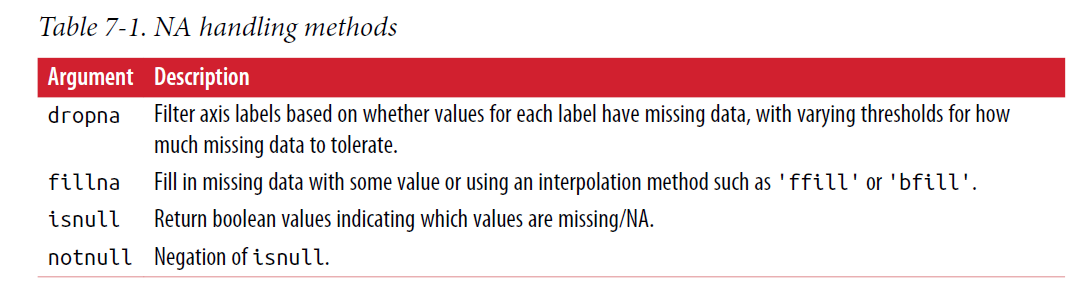

## Filtering Out Missing Data

In [2]:
from numpy import nan as NA

In [3]:
data = pd.Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [4]:
data.dropna() #经常用到舍弃NA

0    1.0
2    3.5
4    7.0
dtype: float64

In [6]:
#利用mask可以达到以上效果, notnull()生成bool的mask
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

dropna()  by default drops **any row** containing a missing value!!!

In [7]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
           [NA, NA, NA], [NA, 6.5, 3.]])
clean_data = data.dropna()

In [8]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [9]:
clean_data

,0,1,2
0,1.0,6.5,3.0


In [10]:
data.dropna(how='all') #默认how='any'，也就是说只要有NaN，那么那一row全都drop
#但how='all'的时候，必须所有row都是NaN才会把这一row给drop掉

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [11]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [12]:
data.dropna(axis=1, how='all')  #上面是drop row，将axis改为1，则对column为参考依据
#可以看到，2 row还全是na，但是column 4全是Na的被drop掉了

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


Suppose